Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Johannes"

---


# CS110 Fall 2019 - Assignment 1
# Divide and Conquer Sorting Algorithms

This assignment focuses on the implementation of sorting algorithms and analyzing their performance both mathematically (using theoretical arguments on the asymptotic behavior of algorithms ) and experimentally (i.e., running experiments for different input arrays and plotting relevant performance results). 

Every CS110 assignment begins with a check-up on your class responsibilities and professional standing, as well as your ability to address one of the course LOs #ComputationalSolutions. Thus to complete the first part of this assignment, you will need to take a screenshot of your CS110 dashboard on Forum where the following is visible:
your name.
your absences for the course have been set to excused up to session 2.2 (inclusively).
This will be evidence that you have submitted acceptable pre-class and make-up work for a CS110 session you may have missed. Check the specific CS110 make-up and pre-class policies in the syllabus of the course.


**NOTES:**

1. Your assignment submission needs to include the following resources:
    * A PDF file must be the first resource. This file must be generated from the template notebook where you have written all of the answers (check this link for instructions on how to do this). Make sure that the PDF displays properly (all text and code can be seen within the paper margins).
    * Make sure that you submit a neat, clearly presented, and easy-to-read PDF. Please make sure to include page numbers
    * Your second resource must be the template notebook you have downloaded from the gist provided and where you included your answers. Submit this file directly following the directions in this picture:

<img src="images/upload.png" width="800" height="200">


2. Questions (1)-(7) will be graded on the indicated LOs, please make sure to consult their descriptions and rubrics in the course syllabus. You will not be penalized for not attempting the optional challenge.

3. After completing the assignment, evaluate the application of the HCs you have identified prior to and while you were working on this assignment and footnote them (refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work). 
Here are some examples of weak applications of some of the relevant HCs:

    * Example 1: “#algorithms: I wrote an implementation of the Bubble sort”. 
        * This is an extremely superficial use of the HC in a course on Algorithms, and your reference will be graded accordingly. Instead, consider what constitutes an algorithm (see Cormen et al, sections 1.1 and 1.2). Once you have a good definition of an algorithm, think of how this notion helped you approach the implementation of the algorithm, analyze its complexity and understand why it’s important to write an optimal python implementation of the algorithm.
    * Example 2: “#dataviz: I plotted nice curves showing the execution time of bubble sort, or I plotted beautiful curves with different colors and labels.”
        * Again, these two examples are very superficial uses of the HC #dataviz. Instead consider writing down how do the plots and figures helped you interpret, analyze and write concluding remarks from your experiments. Or write about any insight you included in your work that came from being able to visualize the curves.
    * Example 3: “#professionalism: I wrote a nice paper/article that follows all the directions in this assignment.” 
        * By now, you should realize that this is a poor application of the HC #professionalism. Instead, comment on how you actively considered the HC while deciding on the format, length, and style for writing your report.

4. Your code will be tested for similarity using Turnitin, both to other students’ work and examples available online. As such, be sure to cite all references that you used in devising your solution. Any plagiarism attempts will be referred to the ASC.


** Complete the following tasks which will be graded in the designated LOs and foregrounded HCs:**

## Question 1. [HCs #responsibility and #professionalism; #ComputationalSolutions]

Submit a PDF file with a screenshot of your CS110 dashboard with the information described above.



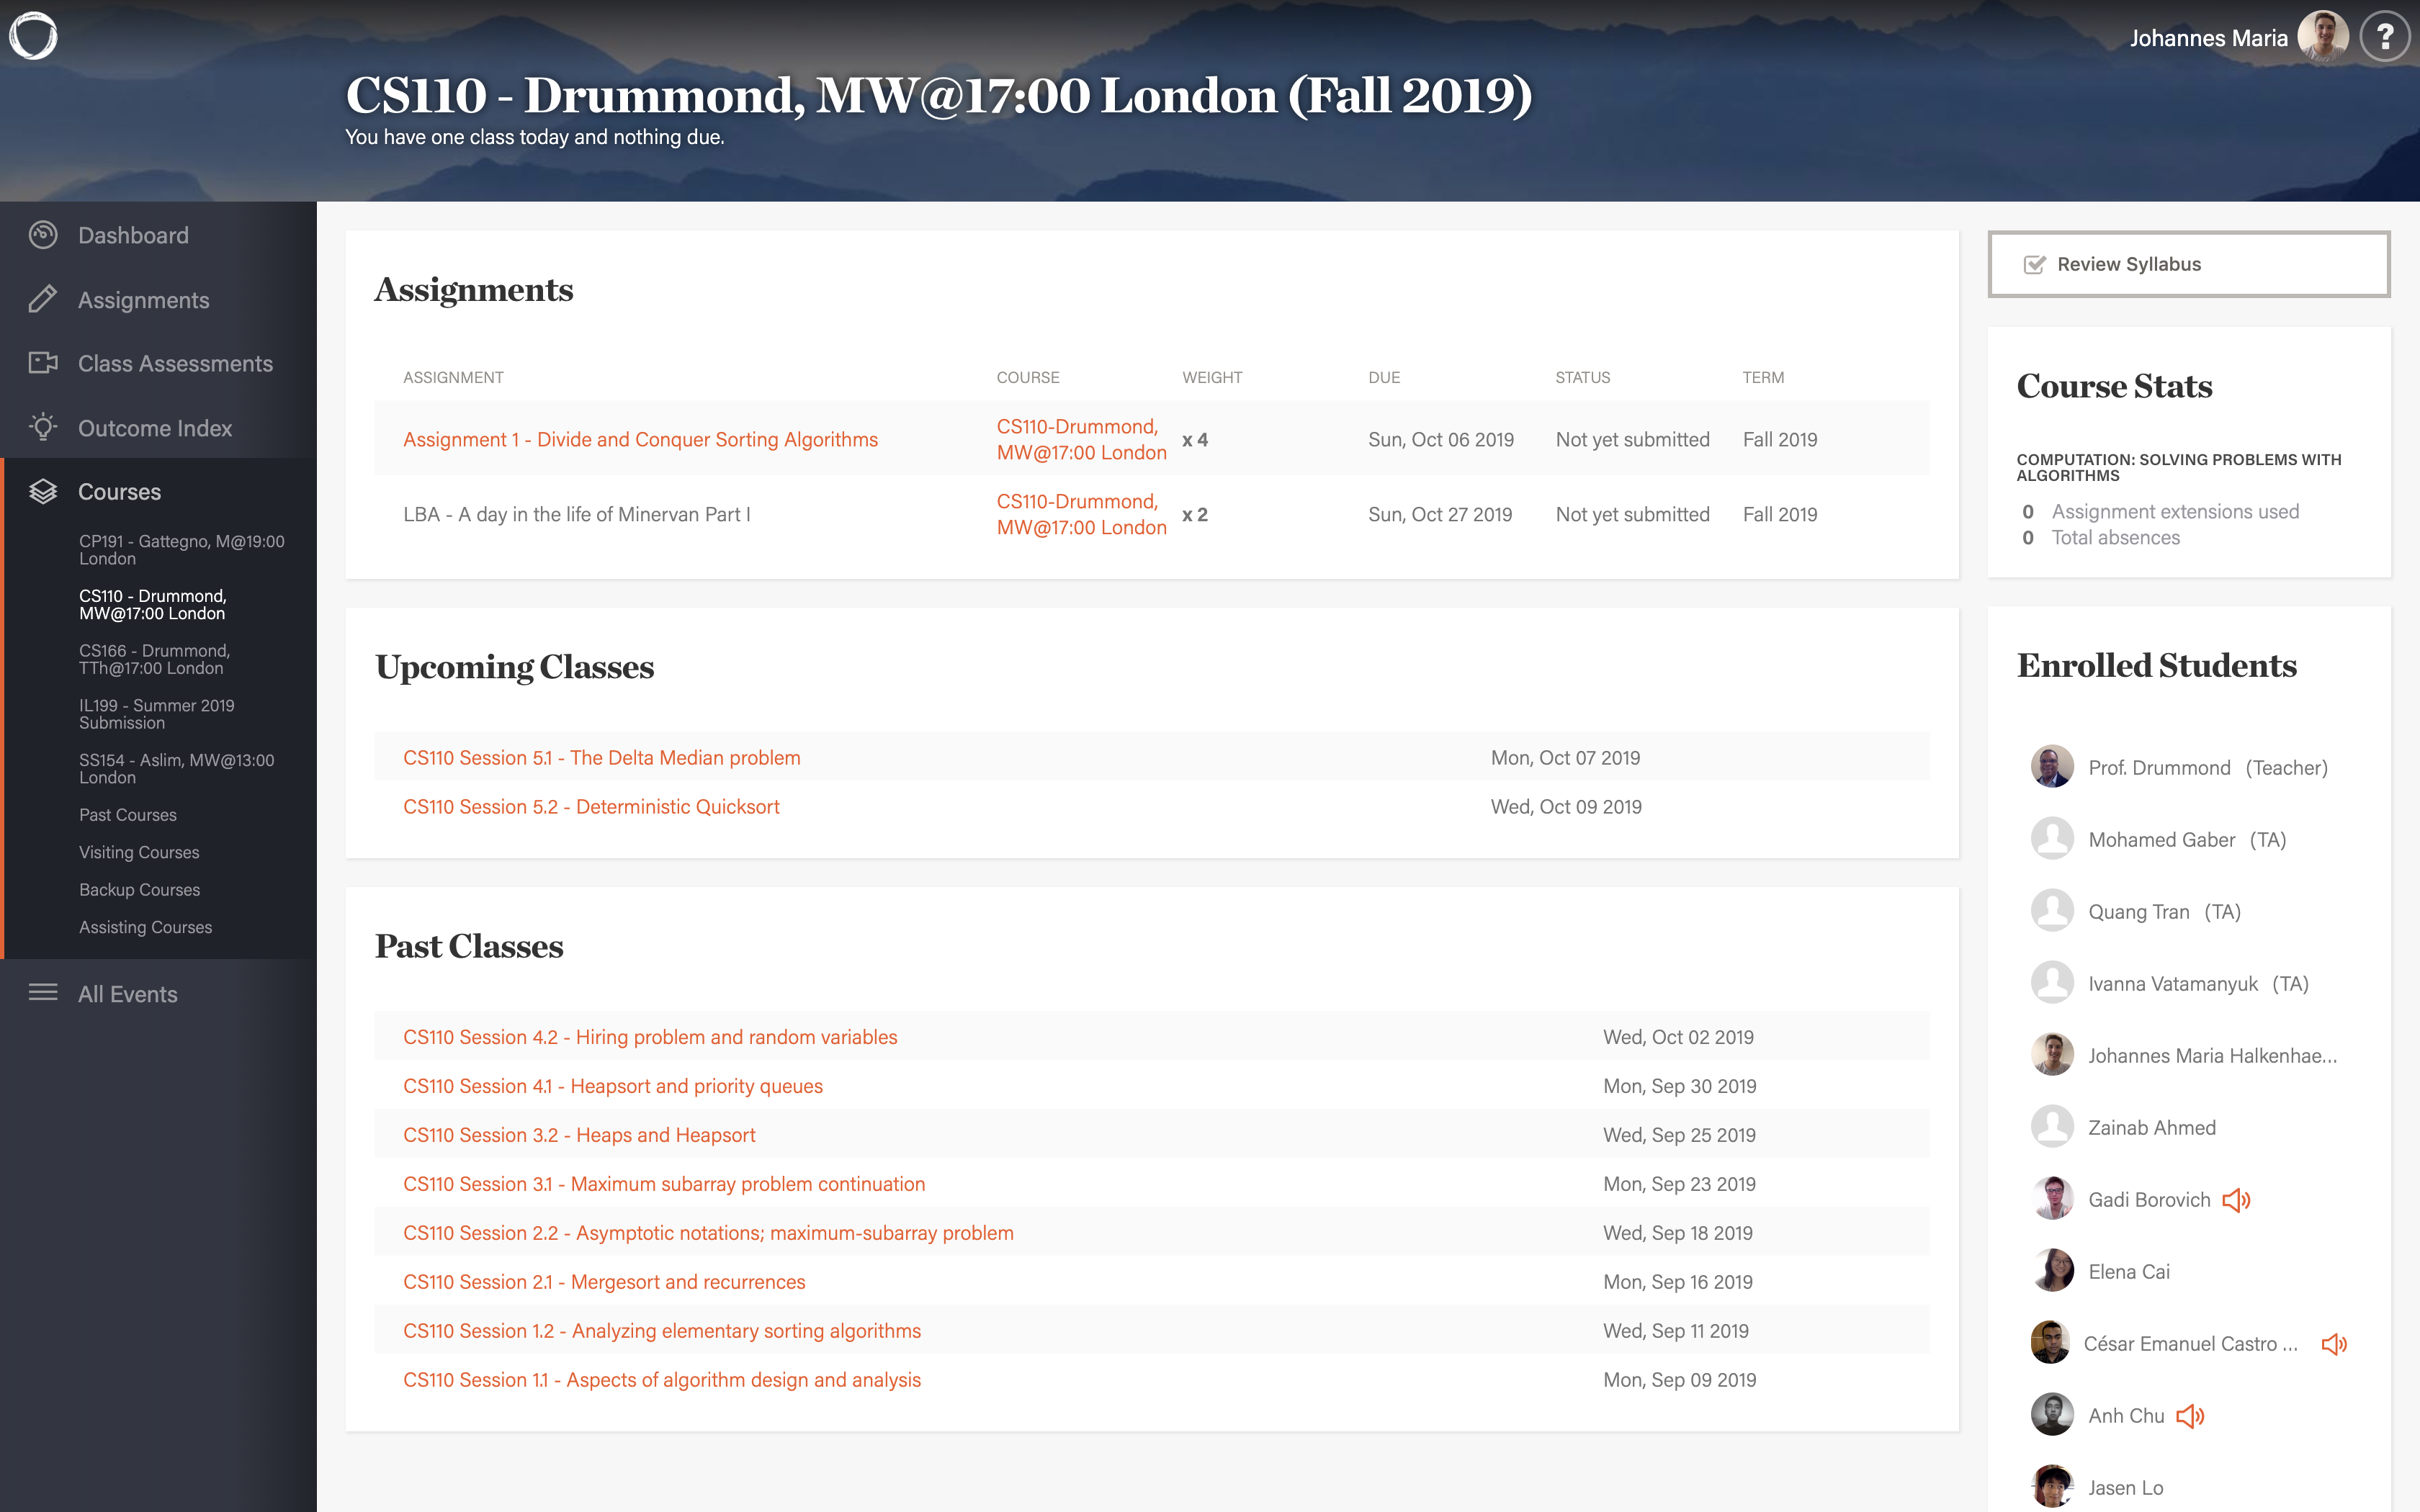

## Question 2. [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Write a Python 3 implementation of the three-way merge sort discussed in class using the code skeleton below. You should also provide at least three test cases (possibly edge cases) that demonstrate the correctness of your code. Your output must be a sorted **Python list**.

In [2]:
## Importing every package I need. 

import matplotlib.pyplot as plt
import math
import itertools
import random
import numpy as np
import time

In [3]:

""" Changes to be made compared to 2-way merge
    First update the merge function to take a third element which is the second splitting point at 2/3.
    Then it needs to include a third array we are checking against. Make left go from left bound to 1/3 marker and middle go from 1/3 to 2/3
    and right from 2/3 to end. Then compare all three lists in the if statements. 
    Inside the recursive function merge_sort create a split into-3 function and three recursive calls.
    
    """
counter = 0

#The merge function with it's arguments. 
def merge(A, l, first_third, second_third, r):
    
    #creating the step counter to estimate efficiency
    global counter 
    
    #finding the lengths of each array
    
    #left array
    l1 = first_third - l + 1
    counter += 1
    
    #The new middle array length
    m1 = second_third - first_third 
    counter += 1
    
    #right array
    r2 = r - second_third 
    counter += 1
    
    #creating the subarrays
    L = (l1 + 1) * [None]
    counter += 1
    
    M = (m1 + 1) * [None]
    counter += 1
    
    R = (r2 + 1) * [None]
    counter += 1
    
    #populating the subarray with the elements of the main list
    for i in range(l1):
        L[i] = A[l + i]
        counter += 1
        
    for m in range(m1):
        M[m] = A[first_third + m + 1]
        counter += 1
        
    for j in range(r2):
        R[j] = A[second_third + j + 1]
        counter += 1
    
    #adding the sentinels
    L[l1] = math.inf
    counter += 1
    
    M[m1] = math.inf
    counter += 1
    
    R[r2] = math.inf
    counter += 1
    
    #initializing the indices for each subarray
    i = 0
    counter += 1
    
    m = 0
    counter += 1
    
    j = 0
    counter += 1
    
    #comparing the two most front cards
    for k in range(l, r + 1):
        
        #if the left is the smallest
        if L[i] <= R[j] and L[i] <= M[m]:
            
            A[k] = L[i]
            counter += 1
            #moving the index
            i = i + 1
            counter += 1
        
        #if the middle is the smallest
        elif M[m] <= L[i] and M[m] <= R[j]:
            A[k] = M[m]
            counter += 1
            m += 1
            counter += 1
        
        #if the right is the smallest
        else:
            A[k] = R[j]
            counter += 1
            #moving the index
            j = j + 1
            counter += 1
       
    return A, counter

merge([1,4,7,2,5,8,3,6,9],0,2,5,8)

([1, 2, 3, 4, 5, 6, 7, 8, 9], 39)

In [4]:
import numpy as np

def threeWayMerge_sort(lst, l, r):

    """Adaptation of 2-way merge sort. Takes as an input the array and the upper and lower bound.
    It splits the input into three recursively until the basecase of a leave of length 1 is reached. 
    Then the items are merged in a rippling up fashion. 
    Returns as an output the sorted array and the total step counter."""
    
    
    #doing recursion until the list is length 1
    if l < r:
        
        #calling on the counter
        global counter
        
        #splitting the array in half. 
        #Added the floor function here to deal with uneven lists
        first_third = math.floor(l + (r-l)/3)
        second_third = math.floor(l + (r-l)*2/3)
        counter += 2
        
        #recursion on first third (left)
        threeWayMerge_sort(lst, l, first_third)
        counter += 1
        
        #recursion on the second third (middle) 
        threeWayMerge_sort(lst, first_third + 1, second_third)
        counter += 1
        
        #recursion on the third third (right) 
        threeWayMerge_sort(lst, second_third + 1, r)
        counter += 1
        
        #merging the subarrays using the merge() function
        merge(lst, l, first_third, second_third, r)
        counter += 1
    
    return lst, counter

A = [11,2,3,6,12,54,33,23,89,6,65,-1,9]

def threeWayMerge(A):
    
    """Implements three-way marge sort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    
    #first start and end point of the to be sorted array
    l = 0
    r = len(A) - 1
    #returns just the list not the counter. 
    return list(threeWayMerge_sort(A, l, r)[0])

threeWayMerge(A)

[-1, 2, 3, 6, 6, 9, 11, 12, 23, 33, 54, 65, 89]

In [5]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3.  [(#SortingAlgorithms, #PythonProgramming, #CodeReadability, #ComputationalCritique] 

Implement a second version of a three-way merge sort that calls selection sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process. Justify what might be an appropriate threshold for the input array for applying selection sort.

In [6]:
#first create the selection sort function

"""Takes an array as an input and iteratively finds the smallest number in the unsorted part of an array. 
It then moves the minimum to the beginning of the unsorted part of the array. This is done until all elements
are sorted and a sorted array can be give as output."""

def selectionSort(A, l, r):
    global counter
    #determine the length of the list
    n = r - l
    counter += 1
    #starting from the first item in the list
    for i in range(l, r):
        #let it be the current min
        minidx = i
        counter += 1
        #comparing it to the other numbers in the list and finding the next smaller number
        for j in range(i+1, r + 1):
            if A[j] < A[minidx]:
                minidx = j
                counter += 1
        #swapping the numbers
        A[i],A[minidx] = A[minidx], A[i]
        counter += 2
        
    #testing and returning the sorted array
    return(A)


In [7]:
### Finding a good threshold for selection sorting ###
"""I know that selection sort performs better on "small" numbers of n.
    Hence, I will test the run time of three way merge vs. selection sort on small n. 
    Where both curves intersect is the threshold"""

store_three_av = []
store_selection_av = []

for i in range(1,501):
    
    store_selection = []
    store_three = []
    
    for _ in range(75):
        
        A = list(np.random.randint(-1000, 1000, i))
        B = A
        t_0 = time.time()
        selectionSort(A,0, len(A)-1)
        store_selection.append(time.time() - t_0)
        
        t_1 = time.time()
        threeWayMerge(B)
        store_three.append(time.time() - t_1)

    
    store_three_av.append(np.mean(store_three))
    store_selection_av.append(np.mean(store_selection))


Text(0, 0.5, 'Time (s)')

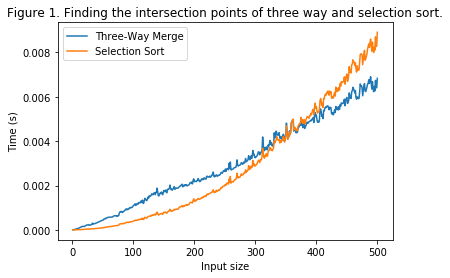

In [8]:
#Let's analyze it graphically

ns = list(range(1,501))

plt.plot(ns, store_three_av)
plt.plot(ns, store_selection_av)
plt.title("Figure 1. Finding the intersection points of three way and selection sort.")
plt.legend(("Three-Way Merge","Selection Sort"))
plt.xlabel("Input size")
plt.ylabel("Time (s)")

Text(0, 0.5, 'Time (s)')

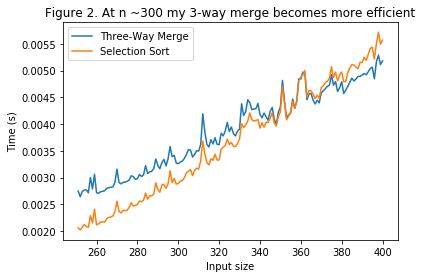

In [9]:
##Let's zoom in

plt.plot(ns[250:400], store_three_av[250:400])
plt.plot(ns[250:400], store_selection_av[250:400])
plt.title("Figure 2. At n ~300 my 3-way merge becomes more efficient")
plt.legend(("Three-Way Merge","Selection Sort"))
plt.xlabel("Input size")
plt.ylabel("Time (s)")

Please note, that the number obtained for the threshold has varied around 300 +- 50 when I re-ran it multiple times. Hence I chose 300 as the threshold which is specific to this algorithm.

In [10]:
#Building the Hybrid function of Three-Way and Selection Sort

"""The first function below implements the divide and conquer algorithm of splitting the function into thirds
to then recursively split them down further until an the node is smaller than 300. As determined in Fig. 2.
Gets the inputs from the second function. I created two functions to adhere to the assignment format.
The input is hence an array and the output is the sorted array."""

def extendedThreeWayMerge_Sorting(lst, l, r):
    
    #Recursion boundary at length of the array being 300 as determined in Fig. 2:
    if r - l > 300:
        
        #calling on the counter
        global counter
        
        #splitting the array in half. 
        #Added the floor function here to deal with uneven lists
        first_third = math.floor(l + (r-l)/3)
        second_third = math.floor(l + (r-l)*2/3)
        counter += 2
        
        #recursion on first third (left)
        extendedThreeWayMerge_Sorting(lst, l, first_third)
        counter += 1
        
        #recursion on the second third (middle) 
        extendedThreeWayMerge_Sorting(lst, first_third + 1, second_third)
        counter += 1
        
        #recursion on the third third (right) 
        extendedThreeWayMerge_Sorting(lst, second_third + 1, r)
        counter += 1
        
        #merging the subarrays using the merge() function
        merge(lst, l, first_third, second_third, r)
        counter += 1
    
    #Using Selection Sort on the subarray.
    else:
        selectionSort(lst, l, r)

        
        
        
    
    return lst, counter

A = [11,2,3,6,12,54,33,23,89,6,9,9,6,3,4,6,3,2-1,1,2,35,5]

def extendedThreeWayMerge(A):
    l = 0
    r = len(A) -1
    extendedThreeWayMerge_Sorting(A, l, r)
    return A

extendedThreeWayMerge(A)

[1, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 6, 9, 9, 11, 12, 23, 33, 35, 54, 89]

In [11]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 4 [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Bucket sort (or Bin sort) is an algorithm that takes as inputs an $n$-element array and the number of buckets, $k$, to be used during sorting.  Then, the algorithm distributes the elements of the input array into $k$-different buckets and proceeds to sort the individual buckets. Then, merges the sorted buckets to obtained the sorted array. Here is pseudocode for the BucketSort algorithm:

<img src="images/bucket.png" width="800" height="200">

The BucketSort above calls the function **GetBucketNum** (see the pseudocode below) to distribute all the elements of array $A$ into $k$-buckets.  Every element in the array is assigned a bucket number based on its value (positive or negative numbers). **GetBucketNum** returns the bucket number that corresponds to element $A[i]$.   It takes as inputs the element of the array, $A[i]$, the max and min elements in $A$, the size of the intervals in every bucket (e.g., if you have numbers with values between 0 and 100 numbers and 5 buckets, every bucket has an interval of size $20 = [100-0]/5$).  Notice that in pseudocode the indices of the arrays are from 1 to $n$. Thus, GetBucketNum consistently returns a number between 1 and $n$ (make sure you account for this in your Python program).

<img src="images/getbucketnum.png" width="800" height="200">

Write a Python 3 implementation of BucketSort that uses the selection sort algorithm for sorting the individual buckets in line 10 of the algorithm.

In [12]:
"""getBucketNum finds the correct bucket.
    Inputs: the integer, the min and max of the array, bucket size and number of buckets"""

def getBucketNum(a, mn, mx, sz, k):
    global counter
    #if integer is the maximum number it is automatically in the last bucket
    if a == mx:
        j = k - 1
        counter += 1
        
    #if the integer is the smallest number it is automatically in the first bucket
    elif a == mn:
        j = 0
        counter += 1
    
    #otherwise we iterate through the different buckets to determine which bucket it belongs to.
    else:
        j = 0
        counter += 1
        #as long as the integer is smaller than the lower bound of the next bucket and smaller than the number of total buckets.
        while a > mn + (sz*j) and j < (k -1):
            j += 1
            counter += 1
    return j
        

In [13]:
def bucketSort(lst, k):
    """Implements BucketSort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    k: int, length of lst
    
    Output: a sorted Python list"""
    
    global counter
    
    if k <= 0:
        return ("At least 1 bucket is needed. Please specify a higher bucket number")
    
    #find min, max and bucket size
    mn = min(lst)
    counter += 1

    mx = max(lst)
    counter += 1
    
    sz = math.ceil((mx - mn)/ k)
    counter += 1
    
    #create a list of lists with each sublist being one bucket
    Buckets = [[] for i in range(k)]

    #for every integer
    for i in range(len(lst)):
        
        #find the bucket b
        b = getBucketNum(lst[i], mn, mx, sz, k)
        counter += 1
        #add the integer into the respective bucket

        Buckets[b].append(lst[i])
        counter += 1

    #Sort each bucket
    for i in range(k):
        #call on the same selection sort that was used in merge sort (so we need to give it a start and finish)
        selectionSort(Buckets[i],0, len(Buckets[i])-1)
        counter += 1
    
    #iteratively add each element from Buckets into one shared list
    lst = list(itertools.chain.from_iterable(Buckets))
    counter += k
    
    
    return lst, counter
A = [12,2,11,11,11]
counter = 0
bucketSort(A, 10)

([2, 11, 11, 11, 12], 87)

In [14]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 5 [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

 Implement a second version of the BucketSort algorithm. This time in line 10 of BucketSort use the Bucket sort recursively until the size of the bucket is less than or equal to k, the base case for the recursion.



In [15]:
def extendedBucketSort(lst, k):
    
    """Implements the recursive version of the BucketSort algorithm
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    k: int, length of lst
    
    
    The recursion creates buckets within buckets within buckets (...) until the base case is reached.
    At the base case, each bucket has a range of 1, i.e., only one value is associated which each bucket. 
    
    The recursion works only with at least 2 buckets.
    Other wise there is just one bucket with the exact same element called on repeatedly.
    
    Output: a sorted Python list"""
    
    global counter
    
    if k <= 1:
        return ("At least 2 buckets are needed. Please specify a higher bucket number")
    if len(lst) <= 1:

        return lst
    
    #find min, max and bucket size
    mn = min(lst)
    counter += 1

    mx = max(lst)
    counter += 1
    
    sz = math.ceil((mx - mn)/ k)
    counter += 1
    
    #create a list of lists with each sublist being one bucket
    Buckets = [[] for i in range(k)]

    #for every integer
    for i in range(len(lst)):
        
        #find the bucket b
        b = getBucketNum(lst[i], mn, mx, sz, k)
        counter += 1
        #add the integer into the respective bucket

        Buckets[b].append(lst[i])
        counter += 1

    #Sort each bucket
    for i in range(k):
        
        #The base case is that each bucket only has one number (e.g. two threes or just one -2019) in it. 
        #In the last recursive call before the base case sz < k so that this "if" is False at the base case.
        #print(sz)
        if sz >= 1:
            #set the bucket to the output of bucketsort
            #print(Buckets)
            #print(Buckets[i])
            Buckets[i] = extendedBucketSort(Buckets[i], k)
            counter += 1
    
    #iteratively add each element from Buckets into one shared list
    lst = list(itertools.chain.from_iterable(Buckets))
    counter += k
    
    return lst
            

    
counter = 0


A = [11,2,3,6,12,54,33,23,89,6,9,9,6,3,4,6,3,2-1,1,2,35,5]
print(extendedBucketSort(A, 5))
print(counter)


[1, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 6, 9, 9, 11, 12, 23, 33, 35, 54, 89]
391


In [16]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 6 [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), three-way merge sort, and the extended merge sort from (3) by producing a plot that illustrates how every running time and number of steps grows with input size. Make sure to:
1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.


In [17]:
##first we need to implement the regular merge 

#The merge function with it's arguments. 
def two_way_merge(A, p, q, r):
    
    #creating the step counter to estimate efficiency
    global counter 
    
    #finding the lengths of each array
    n1 = q - p + 1
    counter += 1
    n2 = r - q 
    counter += 1
    
    #creating the subarray
    L = (n1 + 1) * [None]
    counter += 1
    R = (n2 + 1) * [None]
    counter += 1
    
    #populating the subarray with the elements of the main list
    for i in range(n1):
        L[i] = A[p + i]
        counter += 1
    for j in range(n2):
        R[j] = A[q + j + 1]
        counter += 1
    
    #adding the sentinels
    L[n1] = math.inf
    counter += 1
    R[n2] = math.inf
    counter += 1
    
    #initializing the indices for each subarray
    i = 0
    counter += 1
    j = 0
    counter += 1
    
    #comparing the two most front cards
    for k in range(p, r + 1):
        
        if L[i] <= R[j]:
            A[k] = L[i]
            counter += 1
            #moving the index
            i = i + 1
            counter += 1
        else:
            A[k] = R[j]
            counter += 1
            #moving the indes
            j = j + 1
            counter += 1
       
    return A, counter


def merge_sort(A, p, r ):
    #doing recursion until the list is length 1
    if p < r:
        
        #calling on the counter
        global counter
        
        #splitting the array in half. 
        #Added the floor function here to deal with uneven lists
        q = math.floor((p+r)/2)
        counter += 1
        
        #recursion on first half of the split
        merge_sort(A, p, q)
        counter += 1
        
        #recursion on the second half of the split
        merge_sort(A, q + 1, r)
        counter += 1
        
        #merging the subarrays using the merge() function
        two_way_merge(A, p, q, r)
        counter += 1
    
    return A, counter

A = [11,2,3,6,12,54,33,23,89,6,9,9,6,3,4,6,3,2-1,1,2,35,5]
merge_sort(A, 0, len(A)-1)

([1, 1, 2, 2, 3, 3, 3, 4, 5, 6, 6, 6, 6, 9, 9, 11, 12, 23, 33, 35, 54, 89],
 943)

In [18]:
import time
import random
import statistics

#initializing the counter 
counter_store_two_way_merge_average = []
time_store_merge_two_way_average = []

counter_store_three_way_merge_average = []
time_store_merge_three_way_average = []

counter_store_ext_three_way_merge_average = []
time_store_merge_ext_three_average = []

k_store = []


#looping for different lengths of list
for k in range(1,16):
    
   
    k_store.append(k)
    
    counter_store_two_way_merge = []
    time_store_merge_two_way = []
    
    counter_store_three_way_merge = []
    time_store_merge_three_way = []
    
    counter_store_ext_three_way_merge = []
    time_store_merge_ext_three = []
        
    
    
    for b in range(100):


        #creating a list of k*100 elements. 
        #As the output from each sort updates the list, we have to make copies of it.
        #Otherwise, we pass a sorted list to the subsequent algorithms
        list_k = list(np.random.randint(-1000, 1000, k*1000))
        list_k1 = list_k
        list_k2 = list_k

        #initializing the counter
        counter = 0

        #recording the start time
        start_time = time.time()


        #saving the output for twoway
        counter_some = merge_sort(list_k, 0, len(list_k)-1)
        #recording the steps needed
        counter_store_two_way_merge.append(counter_some[1])
        #recording time
        time_store_merge_two_way.append(time.time() - start_time)

        
        #re-initializing the counter
        counter = 0
        #recording the start time
        start_time = time.time()

        counter_some = threeWayMerge_sort(list_k1, 0, len(list_k)-1)
        counter_store_three_way_merge.append(counter_some[1])
        time_store_merge_three_way.append(time.time() - start_time)


        #re-initializing the counter
        counter = 0
        #recording the start time
        start_time = time.time()

        counter_some = extendedThreeWayMerge_Sorting(list_k2, 0, len(list_k)-1)
        counter_store_ext_three_way_merge.append(counter_some[1])
        time_store_merge_ext_three.append(time.time() - start_time)
        
        
    counter_store_two_way_merge_average.append(statistics.mean(counter_store_two_way_merge))
    time_store_merge_two_way_average.append(statistics.mean(time_store_merge_two_way))

    counter_store_three_way_merge_average.append(statistics.mean(counter_store_three_way_merge))
    time_store_merge_three_way_average.append(statistics.mean(time_store_merge_three_way))

    counter_store_ext_three_way_merge_average.append(statistics.mean(counter_store_ext_three_way_merge))
    time_store_merge_ext_three_average.append(statistics.mean(time_store_merge_ext_three))
        


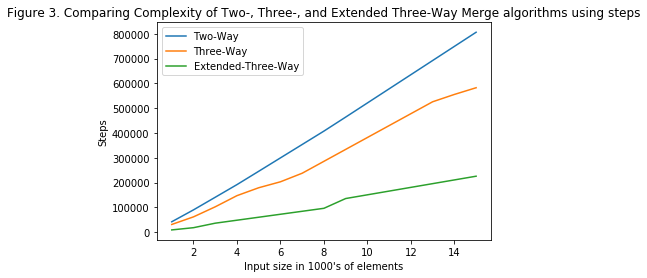

In [19]:
##Plot the counters
plt.plot(k_store, counter_store_two_way_merge_average)
plt.plot(k_store, counter_store_three_way_merge_average)
plt.plot(k_store, counter_store_ext_three_way_merge_average)
plt.title("Figure 3. Comparing Complexity of Two-, Three-, and Extended Three-Way Merge algorithms using steps")
plt.xlabel("Input size in 1000's of elements")
plt.ylabel("Steps")
plt.legend(("Two-Way", "Three-Way","Extended-Three-Way"))

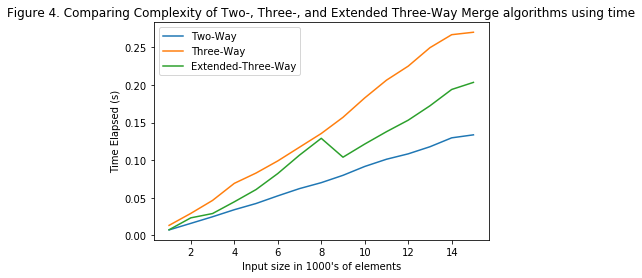

In [20]:
#plot the times
plt.plot(k_store, time_store_merge_two_way_average)
plt.plot(k_store, time_store_merge_three_way_average)
plt.plot(k_store, time_store_merge_ext_three_average)
plt.title("Figure 4. Comparing Complexity of Two-, Three-, and Extended Three-Way Merge algorithms using time")
plt.xlabel("Input size in 1000's of elements")
plt.ylabel("Time Elapsed (s)")
plt.legend(("Two-Way", "Three-Way","Extended-Three-Way"))

#### Note: 
Throughout this assignment every single time: 
 - a variable is define or redefined through addition, 
 - a thing is added or appended to a list, 
 - a function is called on in a recursion,
I increase my counter by one. Comparisons such as in "if-statements" are not counted. 

### Complexity analysis Merge Sorts
Complexities
All three algorithms look likey have have a linear run.
Their theoretical complexities according to Cormen et al. (2009) or class discussion are:
   
${\bf Two Way Merge: \Theta (n * log_2 (n)}$
       
Assuming that there is input size of $n^2$ and that the O(1) comparison that have to be made a negliable.
   
${\bf Three Way Merge:} \Theta (n * log_3 (n)$ 
       
Assuming that there is input size $n^3$ and that the $O(1)$ comparisons that are made are negliable. 
   
${\bf Selection Sort:}  \Theta (n^2)$
   
${\bf Extended Three Way Merge: }$
   
At n <= 300 the algorithm will run with $n^2$ and afterwards we have do $\Theta(log_3 (n))$ splits until we reach the base case (the $\Theta$-notation ignores the fact that the base case is not 1 but 300 as this becomes irrelevant with large n). Hence, I expect a runtime of $\Theta (n^2 log_3 (n))$ which is bigger than the Three-Way Merge. However, as selection sort has less overhead, the runtime shows that the Extended Three Way has an advantage over the Three-Way merge. We can also see how the runtime at 9000 elements shifts in Fig. 3 and Fig. 4 as there is some threshold of the Selection Sort here. 


Note:
I believe my Fig. 4 is an accurate representation of the runtimes of the algorithms which I believe are correctly implemented. However, there seems to be a problem with the step counting functions which leads to the Binary Merge being linear and less efficient than the three-way and extended three-way merge. 

## Question 7. [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), Bucket sort and recursive sort from (5) by producing a plot that illustrates how each running time grows with input size. Make sure to:
1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.


In [21]:
#initializing the overall counters
counter_store_two_way_merge_average = []
time_store_merge_two_way_average = []

counter_store_bucket_average = []
time_store_bucket_average = []

counter_store_bucket_recursive_average = []
time_store_bucket_recursive_average = []

s_store = []


#looping for different lengths of list
for s in range(1,16):
    
    #(Re-)Initialize the counters
    counter_store_two_way_merge = []
    time_store_merge_two_way = []

    counter_store_bucket = []
    time_store_bucket = []

    counter_store_bucket_recursive = []
    time_store_bucket_recursive = []
        
    
    #recording s
    logs = [n*math.log(n, 3) for n in range(1,s*1000 + 1)]
    s_store.append(s)
    for b in range(10):
        

        #creating a list of s*100 elements. 
        #As I am including all three sorts in the same loop, all algorithms sort the same list. 
        #As the algorithms update the list, I have to create 2 additional copies of the list. 
        list_s = list(np.random.randint(-1000, 1000, s*100))
        list_s1 = list_s
        list_s2 = list_s

        #initializing the counter
        counter = 0

        #recording the start time
        start_time = time.time()


        #saving the output for twoway
        counter_some = merge_sort(list_s, 0, len(list_s)-1)
        #recording the steps needed
        counter_store_two_way_merge.append(counter_some[1])
        #recording time
        time_store_merge_two_way.append(time.time() - start_time)

        #re-initializing the counter
        counter = 0
        #recording the start time
        start_time = time.time()

        counter_some = bucketSort(list_s1, len(list_s))
        counter_store_bucket.append(counter_some[1])
        time_store_bucket.append(time.time() - start_time)


        #re-initializing the counter
        counter = 0
        #recording the start time
        start_time = time.time()

        counter_some = extendedBucketSort(list_s2, len(list_s))
        counter_store_bucket_recursive.append(counter)
        time_store_bucket_recursive.append(time.time() - start_time)
        
        
    counter_store_two_way_merge_average.append(statistics.mean(counter_store_two_way_merge))
    time_store_merge_two_way_average.append(statistics.mean(time_store_merge_two_way))

    counter_store_bucket_average.append(statistics.mean(counter_store_bucket))
    time_store_bucket_average.append(statistics.mean(time_store_bucket))

    counter_store_bucket_recursive_average.append(statistics.mean(counter_store_bucket_recursive))
    time_store_bucket_recursive_average.append(statistics.mean(time_store_bucket_recursive))
        


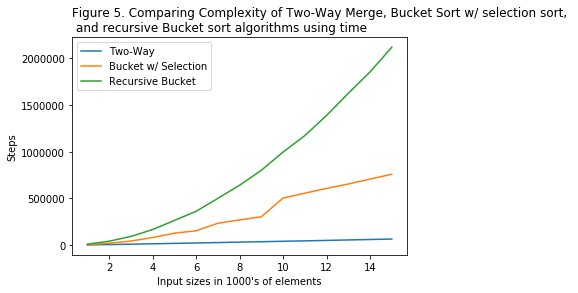

In [22]:
##Plot the counters

plt.plot(k_store, counter_store_two_way_merge_average)
plt.plot(k_store, counter_store_bucket_average)
plt.plot(k_store, counter_store_bucket_recursive_average)
plt.title("Figure 5. Comparing Complexity of Two-Way Merge, Bucket Sort w/ selection sort, \n and recursive Bucket sort algorithms using time", loc = "left")
plt.xlabel("Input sizes in 1000's of elements")
plt.ylabel("Steps")
plt.legend(("Two-Way", "Bucket w/ Selection","Recursive Bucket"))

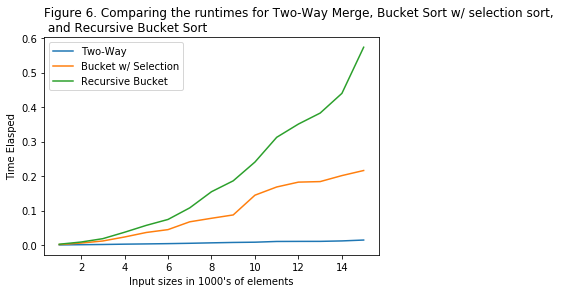

In [23]:
plt.plot(k_store, time_store_merge_two_way_average)
plt.plot(k_store, time_store_bucket_average)
plt.plot(k_store, time_store_bucket_recursive_average)
plt.title("Figure 6. Comparing the runtimes for Two-Way Merge, Bucket Sort w/ selection sort, \n and Recursive Bucket Sort", loc = "left")
plt.xlabel("Input sizes in 1000's of elements")
plt.ylabel("Time Elasped")
plt.legend(("Two-Way", "Bucket w/ Selection","Recursive Bucket"))

### Complexity Analysis Bucket Sorts

Steps:

As shown in Fig. 5, the step size of the recursive Bucket Sort increases in a $n log (n)$ fashion. Similarly, the Two-Way Merge also runs in a $n log_2 (n)$ way. This is better observable here than it is in Fig. 3. Worse than Two-Way Merge but better than the recursive Bucket Sort is the Bucket Sort that uses selection sort. 

Time Complexity:

As discussed above, it is expected that a 2-way Merge Sort will perform with complexity $\Theta(n log_2 (n))$. This can be observed here, but only with some difficulty due to the comparatively large practical runtimes of the two bucket sorts. The recursive function is much less efficient than the function using selection sort. This hinges on a key assumption of the bucket sort: the uniform distribution of inputs. A bucket sort with selection sort is defined to have expected runtime of $O(n)$ (Cormen et al, 2009). If the inputs are truely uniformly distributed and there are n buckets, then the average bucket only has one element in it. That means that selection sort will only have one value as an input which leads to the runtime that is almost linear in Fig. 6. The recursive bucket sort will have a much larger run-time because it will recursively call bucket sort again should the length of the bucket be larger than one. Here we observe what can be expected of a recursive function $O (n log (n))$.



## HCs ##

#algorithms: Through my use of the sorting algorithms and their successful implementation, I am able to analyze their complexities through an understanding of how they work. E.g. I understand how the recursive algorithms divide and conquer their tasks and why that leads to the specific complexities we can observe. My understanding is also shown by my explanation of the key aspects of the algorithm at the beginning of the its implementation.

#dataviz: Fig. 1 and Fig. 2 show how data visualization can help solve a problem graphically. It is an illustration of how I am able to generate useful figures that are not only formatted correctly but also help me optimize my algorithms and improve on them. 

#breakitdown: First, I had to break down the task of writing an algorithm into subtasks such as when adjusting my binary merge (E.g. I wrote down specifically how to adapt it for three-way merge). While debugging my code I had to constantly apply breakitdown principles as I had to go through the algorithms and break them into problem areas. This could be done by splitting the function into different components and asking myself what part of the problem it solved and if it did so successfully.

## [Optional challenge] Question 8 (#SortingAlgorithm and/or #ComputationalCritique) 

Implement k-way merge sort, where the user specifies k. Develop and run experiments to support a hypothesis about the “best” value of k.

In [24]:
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

# References #

Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2009). Introduction to algorithms (3rd ed.). Cambridge, MA: MIT Press.